You are a data analyst working for a tech company closely monitoring the AI tools market. You want to understand the evolving popularity of three major AI tools, ChatGPT, Gemini, and Microsoft Copilot, and identify which tool is gaining the most traction and how they compare over time.


<img src="ai_tools.jpg" align="center"/>

You'll work with real-world time series data that captures the global interest in these tools over several weeks. Your goal is to analyze this data, uncover patterns, and provide actionable insights to help your company make informed decisions. This might include determining where to focus marketing efforts, predicting future trends, or identifying potential areas for improvement.

Are you ready to help your company stay ahead of the curve in the competitive AI tools market? Let's get started!

### The Data

The Google Trends data is available as a CSV file `ai_tools_comparison.csv`.
The data contains the number of worldwide searches for chatGpt, Gemini, and Microsoft Copilot over the past 12 months as of September 2024. 
<!--- Link to query: https://trends.google.com/trends/explore?q=chatgpt,gemini,%2Fg%2F11tsqm45vd&hl=en-US -->

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

,week,chatgpt,gemini,microsoft_copilot
0,2023-08-27,56,3,1
1,2023-09-03,56,3,1
2,2023-09-10,63,3,1
3,2023-09-17,64,3,1
4,2023-09-24,66,3,1


Most consistent tool: chatgpt


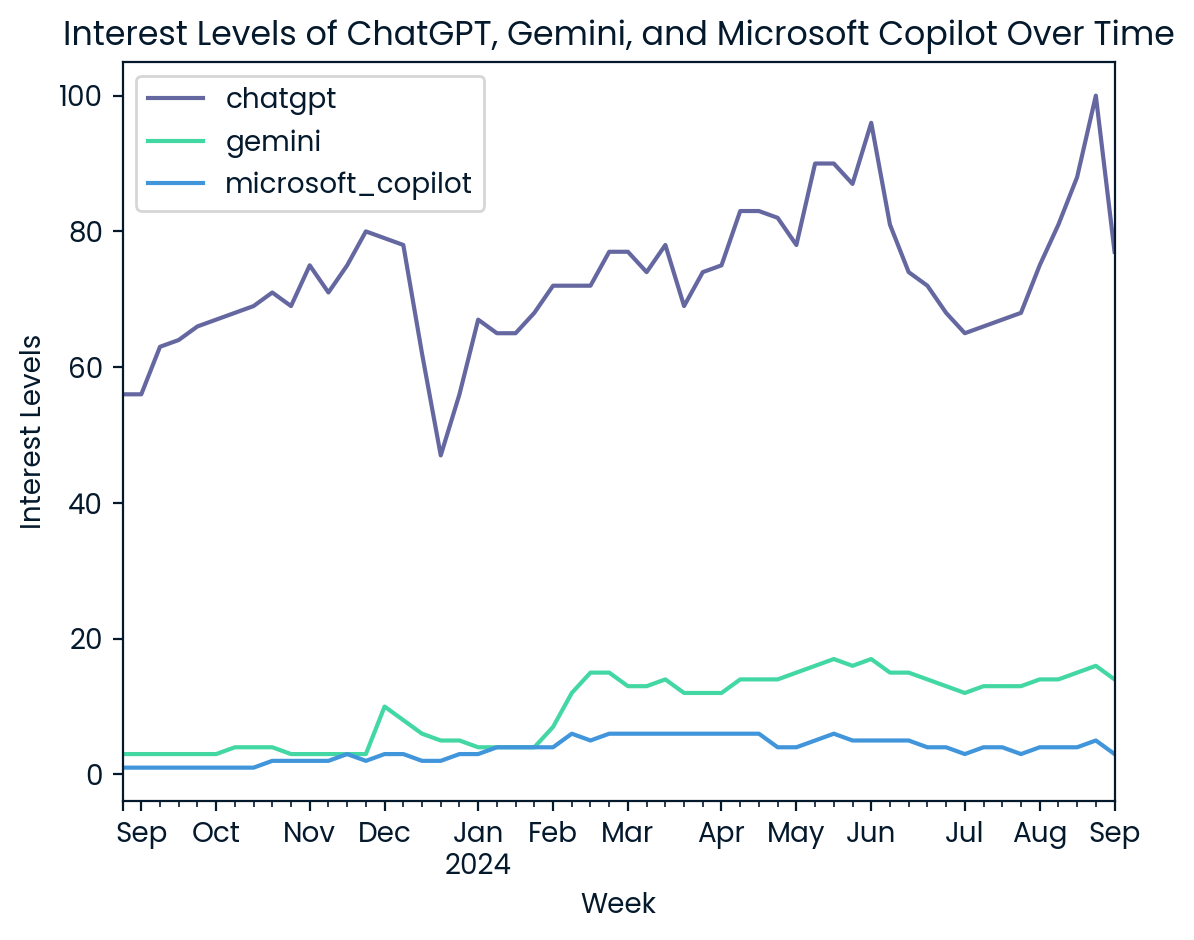

The worst month and year for ChatGPT: December 2023
2024-05-31 00:00:00
Month with the highest interest: May


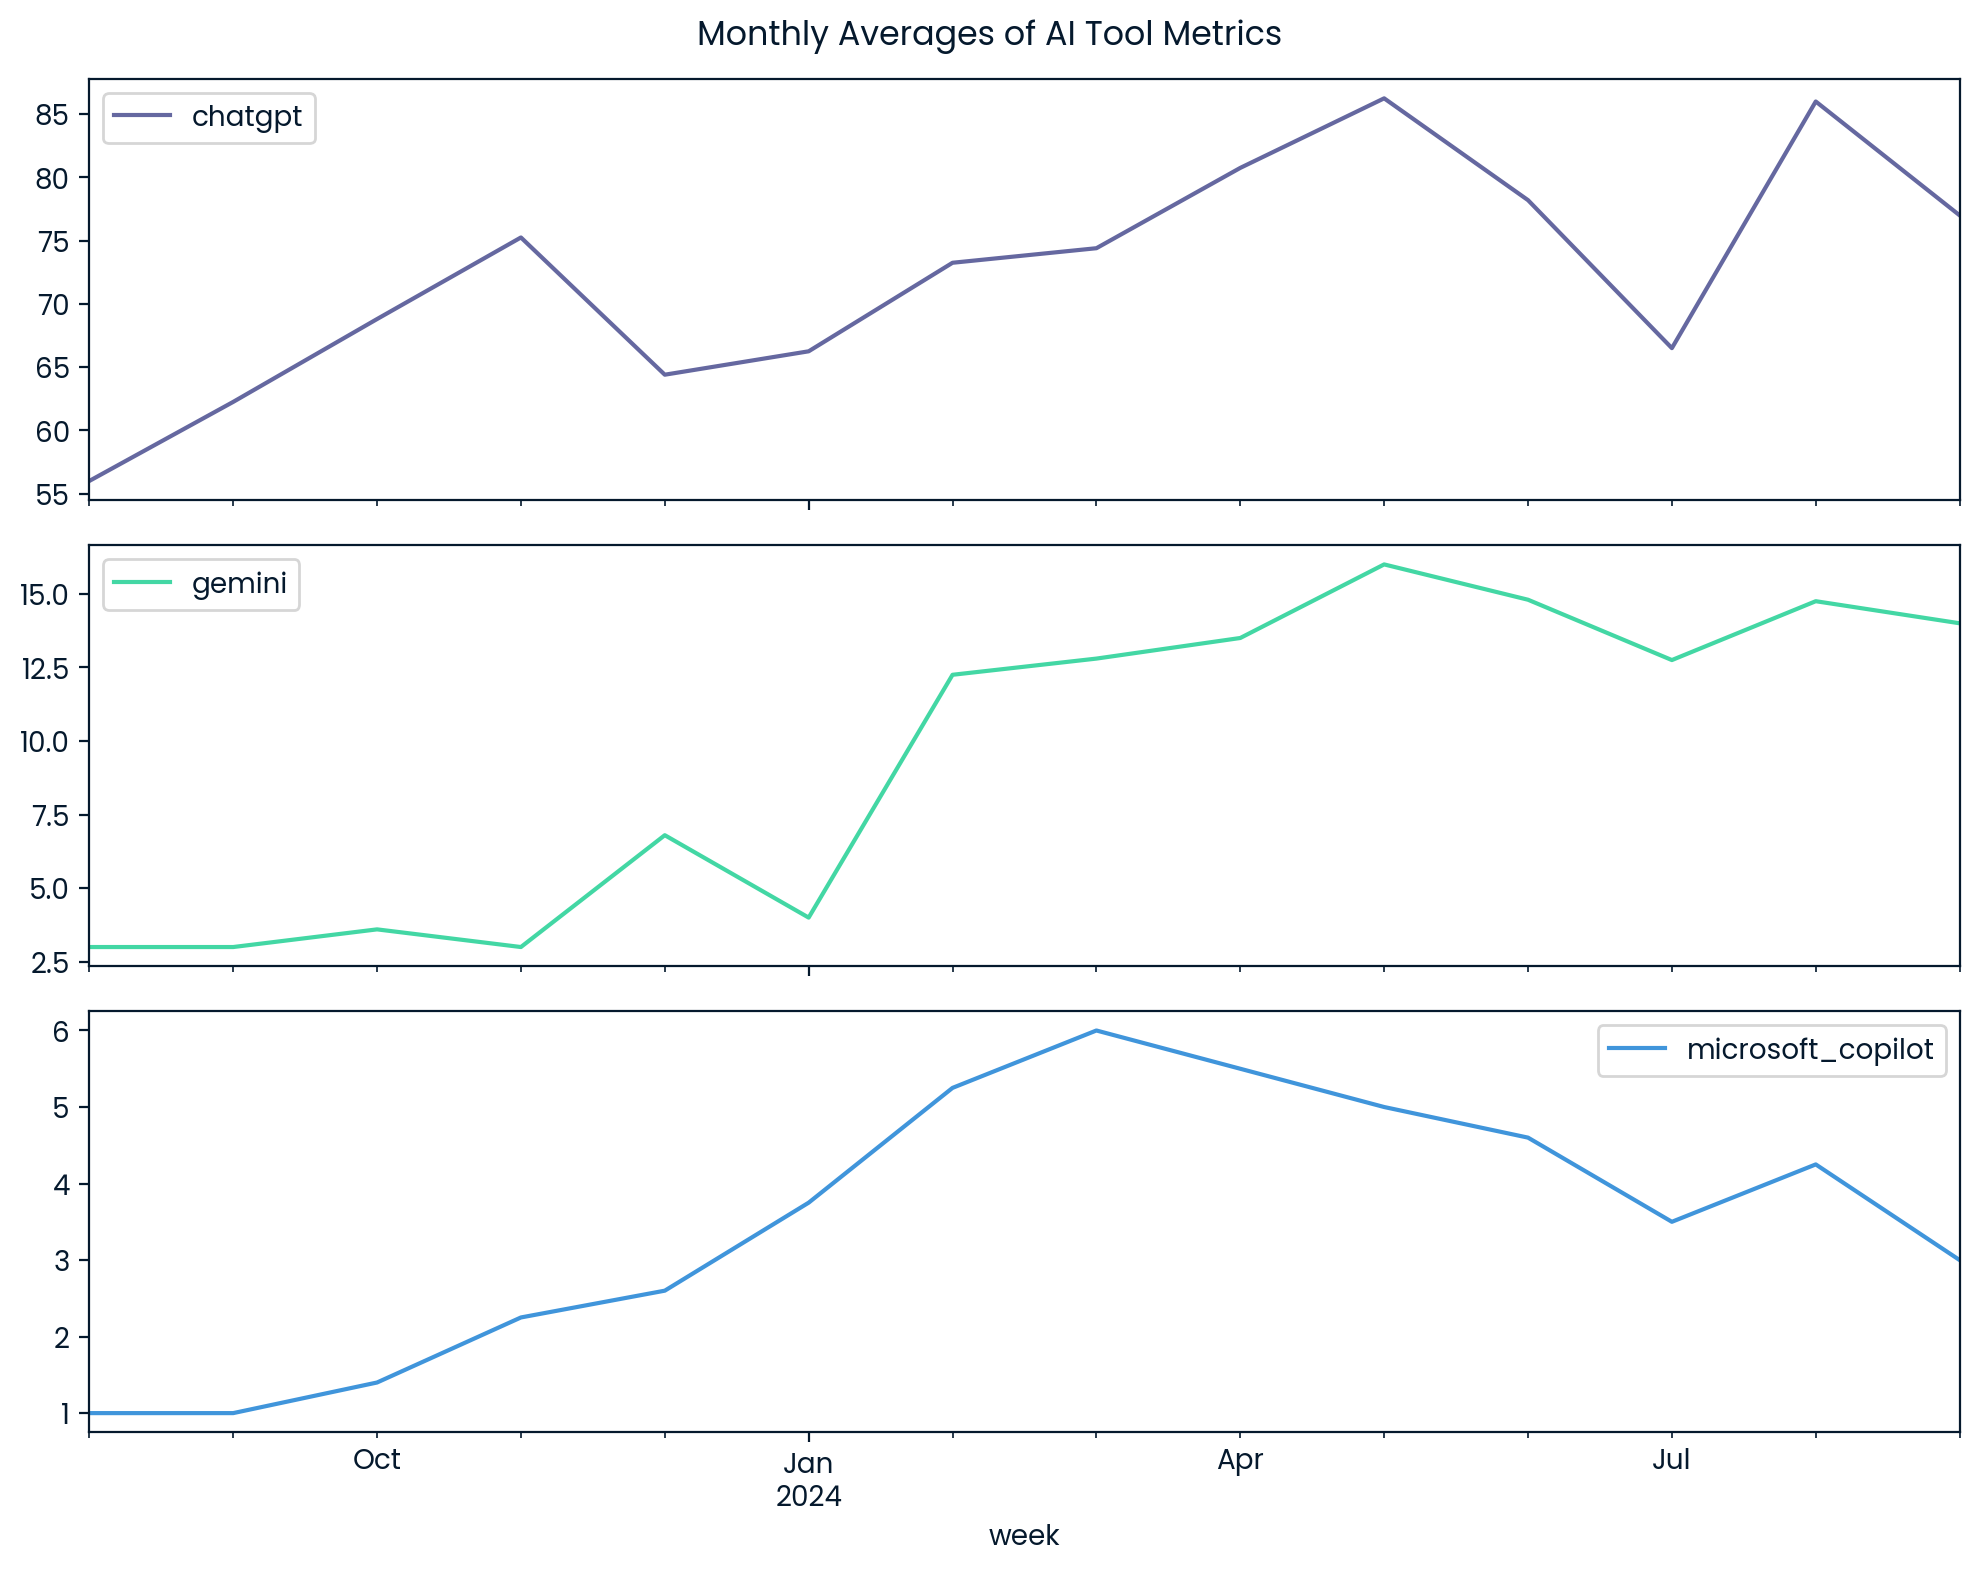

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
trends = pd.read_csv('ai_tools_comparison.csv')

# Inspect the data
trends.head()

# Convert the 'week' column to datetime format for accurate time series analysis
trends['week'] = pd.to_datetime(trends['week'])

# Set the 'week' column as the index of the DataFrame to facilitate time series operations
trends.set_index('week', inplace=True)

# Question 1: Which AI tool has shown the most consistent growth in interest over the observed period (the full dataset)?

# Calculate the week-over-week percentage change for each tool
growth_rates = trends.pct_change().fillna(0).mul(100)

# Calculate the standard deviation of the growth rates for each tool
std_dev = growth_rates.std()

# Identify the tool with the smallest standard deviation, indicating the most consistent growth
most_consistent_tool = std_dev[std_dev == std_dev.min()].index[0]  

# Print the result
print(f"Most consistent tool: {most_consistent_tool}")

# Question 2: Around which month and year does ChatGPT experience its largest decline in interest?

# Create a copy of the trends DataFrame to work with
interest_levels = trends.copy()

# Plot the interest levels of ChatGPT, Gemini, and Microsoft Copilot over time
interest_levels.plot(title="Interest Levels of ChatGPT, Gemini, and Microsoft Copilot Over Time")

# Add labels to the x-axis and y-axis for better readability
plt.xlabel('Week')
plt.ylabel('Interest Levels')

# Display the plot
plt.show()

# Identify the month and year when ChatGPT experienced the biggest decline in interest by looking for the lowest point on the trend line and reading the x-axis at that point
gpt_dip = "December 2023" # January 2024 is also accepted

# Print the result
print(f"The worst month and year for ChatGPT: {gpt_dip}")

# Question 3: What month had the highest average interest across all tools?

# Resample the data to monthly averages
# This will convert the weekly data into monthly data by taking the mean of each month
monthly_data = trends.resample('M').mean()

# Calculate the overall maximum for all tools combined
# This involves finding the month with the highest average interest across all tools
# First calculate the mean interest for each month across all tools; then, sort the values in descending order
# Finally, get the month name of the first entry, which corresponds to the highest average interest
print(monthly_data.mean(axis=1).sort_values(ascending=False).index[0])

best_month = "May"

# Here is a more efficient way of coding the same thing
best_month = monthly_data.mean(axis=1).idxmax().strftime('%B')

# Print the result
print(f"Month with the highest interest: {best_month}")

# Here is a more efficient way of coding the same thing
best_month = monthly_data.mean(axis=1).idxmax().strftime('%B')

# Optional: Plot the resampled monthly data for each AI tool to check for seasonality
# This will help us visualize the trends and see if there are any seasonal patterns
monthly_data.plot(subplots=True, figsize=(10, 8), title='Monthly Averages of AI Tool Metrics')

# Adjust the layout to prevent overlap and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()